# Análise dos Datasets de Avaliação

Este notebook apresenta uma visão geral de todos os datasets disponíveis para avaliação dos projetos do hackathon.

**Datasets principais (com versões de desenvolvimento):**
- **Classificação**: Adult Census Income
- **Regressão**: California Housing
- **Séries Temporais**: Air Passengers

**Datasets adicionais (apenas completos):**
- **Classificação**: Online Shoppers
- **Regressão**: Insurance
- **Séries Temporais**: Daily Temperature

Cada dataset principal possui 3 versões:
- `dataset.csv` - Dataset completo para avaliação final
- `dataset_funcionalidade.csv` - Subset menor para teste de funcionalidade
- `dataset_performance.csv` - Subset médio para teste de performance

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

---
## 1. Classificação

### Adult Census Income

Dataset do censo americano para prever se a renda anual é maior ou menor que $50K.

**Target:** `income` (binário: <=50K, >50K)

**Colunas Categóricas (9):**
- `workclass` (tipo de empregador: Private, Self-emp, Federal-gov, etc.)
- `education` (nível educacional: Bachelors, HS-grad, Masters, etc.)
- `marital_status` (estado civil)
- `occupation` (profissão)
- `relationship` (relação familiar: Husband, Wife, Own-child, etc.)
- `race` (raça)
- `sex` (sexo)
- `native_country` (país de origem)

**Colunas Numéricas (6):**
- `age` (idade)
- `fnlwgt` (peso final - número de pessoas que o censo acredita que a entrada representa)
- `education_num` (anos de educação)
- `capital_gain`, `capital_loss` (ganhos/perdas de capital)
- `hours_per_week` (horas trabalhadas por semana)

In [3]:
df_adult = pd.read_csv('classificacao/adult_census.csv')
print(f"Shape: {df_adult.shape}")
print(f"\nDistribuição do target (income):")
print(df_adult['income'].value_counts())
print(f"\nTipos de dados:")
print(df_adult.dtypes)
print(f"\nEstatísticas descritivas:")
print(df_adult.describe())
df_adult.head()

Shape: (48842, 15)

Distribuição do target (income):
income
<=50K    37155
>50K     11687
Name: count, dtype: int64

Tipos de dados:
age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

Estatísticas descritivas:
                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000   

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Versões de Desenvolvimento

In [4]:
# Versões de desenvolvimento
df_adult_func = pd.read_csv('classificacao/adult_census_funcionalidade.csv')
df_adult_perf = pd.read_csv('classificacao/adult_census_performance.csv')

print("Comparação das versões:")
print(f"  - Completo:       {df_adult.shape[0]:,} registros")
print(f"  - Funcionalidade: {df_adult_func.shape[0]:,} registros")
print(f"  - Performance:    {df_adult_perf.shape[0]:,} registros")

Comparação das versões:
  - Completo:       48,842 registros
  - Funcionalidade: 34,189 registros
  - Performance:    14,653 registros


---
## 2. Regressão

### California Housing

Dataset para prever o valor mediano de casas em distritos da Califórnia.

**Target:** `median_house_value` (valor mediano das casas no distrito)

**Colunas Categóricas (1):**
- `ocean_proximity` (proximidade do oceano: NEAR BAY, INLAND, NEAR OCEAN, <1H OCEAN, ISLAND)

**Colunas Numéricas (8):**
- `longitude`, `latitude` (coordenadas geográficas)
- `housing_median_age` (idade mediana das casas)
- `total_rooms`, `total_bedrooms` (total de cômodos e quartos)
- `population`, `households` (população e número de domicílios)
- `median_income` (renda mediana dos moradores)

In [5]:
df_housing = pd.read_csv('regressao/california_housing.csv')
print(f"Shape: {df_housing.shape}")
print(f"\nValores nulos por coluna:")
print(df_housing.isnull().sum())
print(f"\nEstatísticas descritivas:")
print(df_housing.describe())
df_housing.head()

Shape: (20640, 10)

Valores nulos por coluna:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Estatísticas descritivas:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_b

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Versões de Desenvolvimento

In [6]:
# Versões de desenvolvimento
df_housing_func = pd.read_csv('regressao/california_housing_funcionalidade.csv')
df_housing_perf = pd.read_csv('regressao/california_housing_performance.csv')

print("Comparação das versões:")
print(f"  - Completo:       {df_housing.shape[0]:,} registros")
print(f"  - Funcionalidade: {df_housing_func.shape[0]:,} registros")
print(f"  - Performance:    {df_housing_perf.shape[0]:,} registros")

Comparação das versões:
  - Completo:       20,640 registros
  - Funcionalidade: 14,448 registros
  - Performance:    6,192 registros


---
## 3. Séries Temporais

### Air Passengers

Série temporal clássica de passageiros aéreos mensais (1949-1960). Apresenta sazonalidade clara e tendência crescente.

**Target:** `Passengers` (número de passageiros em milhares)

**Coluna Temporal:** `Month` (formato: YYYY-MM)

**Características:** Série univariada, 144 observações mensais

In [7]:
df_air = pd.read_csv('series_temporais/air_passengers.csv')
print(f"Shape: {df_air.shape}")
print(f"\nPeríodo: {df_air['Month'].iloc[0]} a {df_air['Month'].iloc[-1]}")
print(f"\nEstatísticas descritivas:")
print(df_air.describe())
df_air.head()

Shape: (144, 2)

Período: 1949-01 a 1960-12

Estatísticas descritivas:
       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


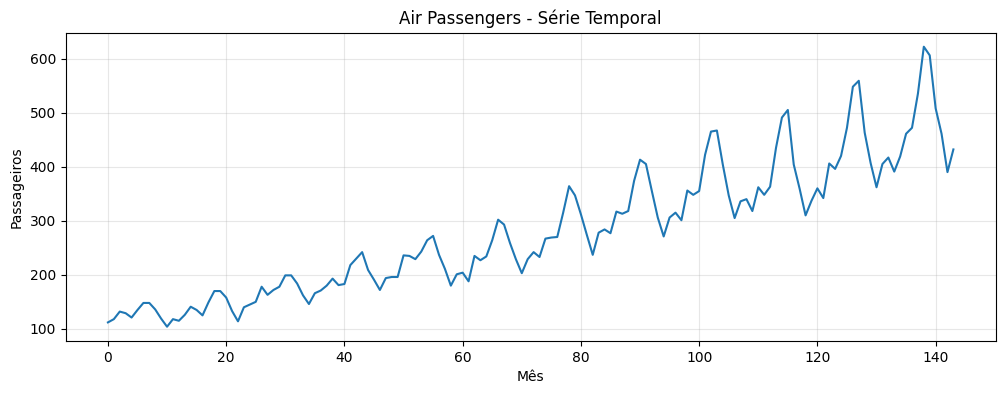

In [8]:
plt.figure(figsize=(12, 4))
plt.plot(df_air['Passengers'])
plt.title('Air Passengers - Série Temporal')
plt.xlabel('Mês')
plt.ylabel('Passageiros')
plt.grid(True, alpha=0.3)
plt.show()

#### Versões de Desenvolvimento

In [9]:
# Versões de desenvolvimento
df_air_func = pd.read_csv('series_temporais/air_passengers_funcionalidade.csv')
df_air_perf = pd.read_csv('series_temporais/air_passengers_performance.csv')

print("Comparação das versões:")
print(f"  - Completo:       {df_air.shape[0]:,} registros")
print(f"  - Funcionalidade: {df_air_func.shape[0]:,} registros")
print(f"  - Performance:    {df_air_perf.shape[0]:,} registros")

Comparação das versões:
  - Completo:       144 registros
  - Funcionalidade: 132 registros
  - Performance:    12 registros


---
## 4. Datasets Adicionais

Datasets extras disponíveis para desenvolvimento e testes (sem versões funcionalidade/performance).

### Online Shoppers (Classificação)

Dataset de sessões de navegação em e-commerce para prever se a visita resultará em compra.

**Target:** `Revenue` (binário: True/False)

In [10]:
df_shoppers = pd.read_csv('classificacao/online_shoppers.csv')
print(f"Shape: {df_shoppers.shape}")
print(f"\nDistribuição do target (Revenue):")
print(df_shoppers['Revenue'].value_counts())
df_shoppers.head()

Shape: (12330, 18)

Distribuição do target (Revenue):
Revenue
False    10422
True      1908
Name: count, dtype: int64


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Insurance (Regressão)

Dataset para prever custos de seguro de saúde.

**Target:** `charges` (custo do seguro)

In [11]:
df_insurance = pd.read_csv('regressao/insurance.csv')
print(f"Shape: {df_insurance.shape}")
print(f"\nEstatísticas do target (charges):")
print(df_insurance['charges'].describe())
df_insurance.head()

Shape: (1338, 7)

Estatísticas do target (charges):
count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Daily Temperature (Séries Temporais)

Série temporal de temperaturas mínimas diárias em Melbourne, Austrália (1981-1990).

**Target:** `Temperature` (temperatura mínima em °C)

In [12]:
df_temp = pd.read_csv('series_temporais/daily_temperature.csv')
print(f"Shape: {df_temp.shape}")
print(f"\nPeríodo: {df_temp['Date'].iloc[0]} a {df_temp['Date'].iloc[-1]}")
print(f"\nEstatísticas do target (Temperature):")
print(df_temp['Temperature'].describe())
df_temp.head()

Shape: (3650, 2)

Período: 1981-01-01 a 1990-12-31

Estatísticas do target (Temperature):
count    3650.000000
mean       11.177753
std         4.071837
min         0.000000
25%         8.300000
50%        11.000000
75%        14.000000
max        26.300000
Name: Temperature, dtype: float64


,Date,Temperature
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


---
## Resumo dos Datasets

### Datasets Principais (com versões de desenvolvimento)

| Tipo | Dataset | Completo | Funcionalidade | Performance | Target |
|------|---------|----------|----------------|-------------|--------|
| Classificação | Adult Census | 48.842 | ~500 | ~5.000 | income |
| Regressão | California Housing | 20.640 | ~500 | ~2.000 | median_house_value |
| Séries Temporais | Air Passengers | 144 | ~50 | ~100 | Passengers |

### Datasets Adicionais (apenas completos)

| Tipo | Dataset | Registros | Target |
|------|---------|-----------|--------|
| Classificação | Online Shoppers | 12.330 | Revenue |
| Regressão | Insurance | 1.338 | charges |
| Séries Temporais | Daily Temperature | 3.650 | Temperature |